#### **FTSE 100 index Time Series Analysis**


This code is a simple time series analysis of the FTSE 100 index time series, from 2010 to 2024, to highlight the major stylized facts of financial time series


In [1]:
import numpy as np
import math
import random
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot_2samples
import statsmodels.api as sm
import scipy.stats as st
plt.style.use('seaborn-v0_8-dark')

In [2]:
ftse = yf.download("^FTSE", start="2009-12-31", end="2024-02-24") #download the through yfinance the historical data
ftse = ftse['Adj Close']
ftse = pd.DataFrame(ftse)
ftse.head()


[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2009-12-31,5412.899902
2010-01-04,5500.299805
2010-01-05,5522.500000
2010-01-06,5530.000000
2010-01-07,5526.700195


**Compute the log returns as:**


**$ln\frac{S_{t}}{S_{t-1}}$**

In [29]:
#compute log returns
ftse["log_returns"] = np.log(ftse / ftse.shift()).dropna() #compute the log return

In [54]:
#simulate a t_student with mean and std equal to FTSE 100
degree_freedom = 7.5
t_student = np.random.standard_t(degree_freedom,ftse.shape[0])
t_student = t_student*ftse.log_returns.std()+ftse.log_returns.mean()


#simulate a normal with mean and std equal to FTSE 100
normal = [random.gauss(ftse.log_returns.mean(),ftse.log_returns.std()) for i in range(ftse.shape[0])] #generate white noise
normal = np.array(normal)  



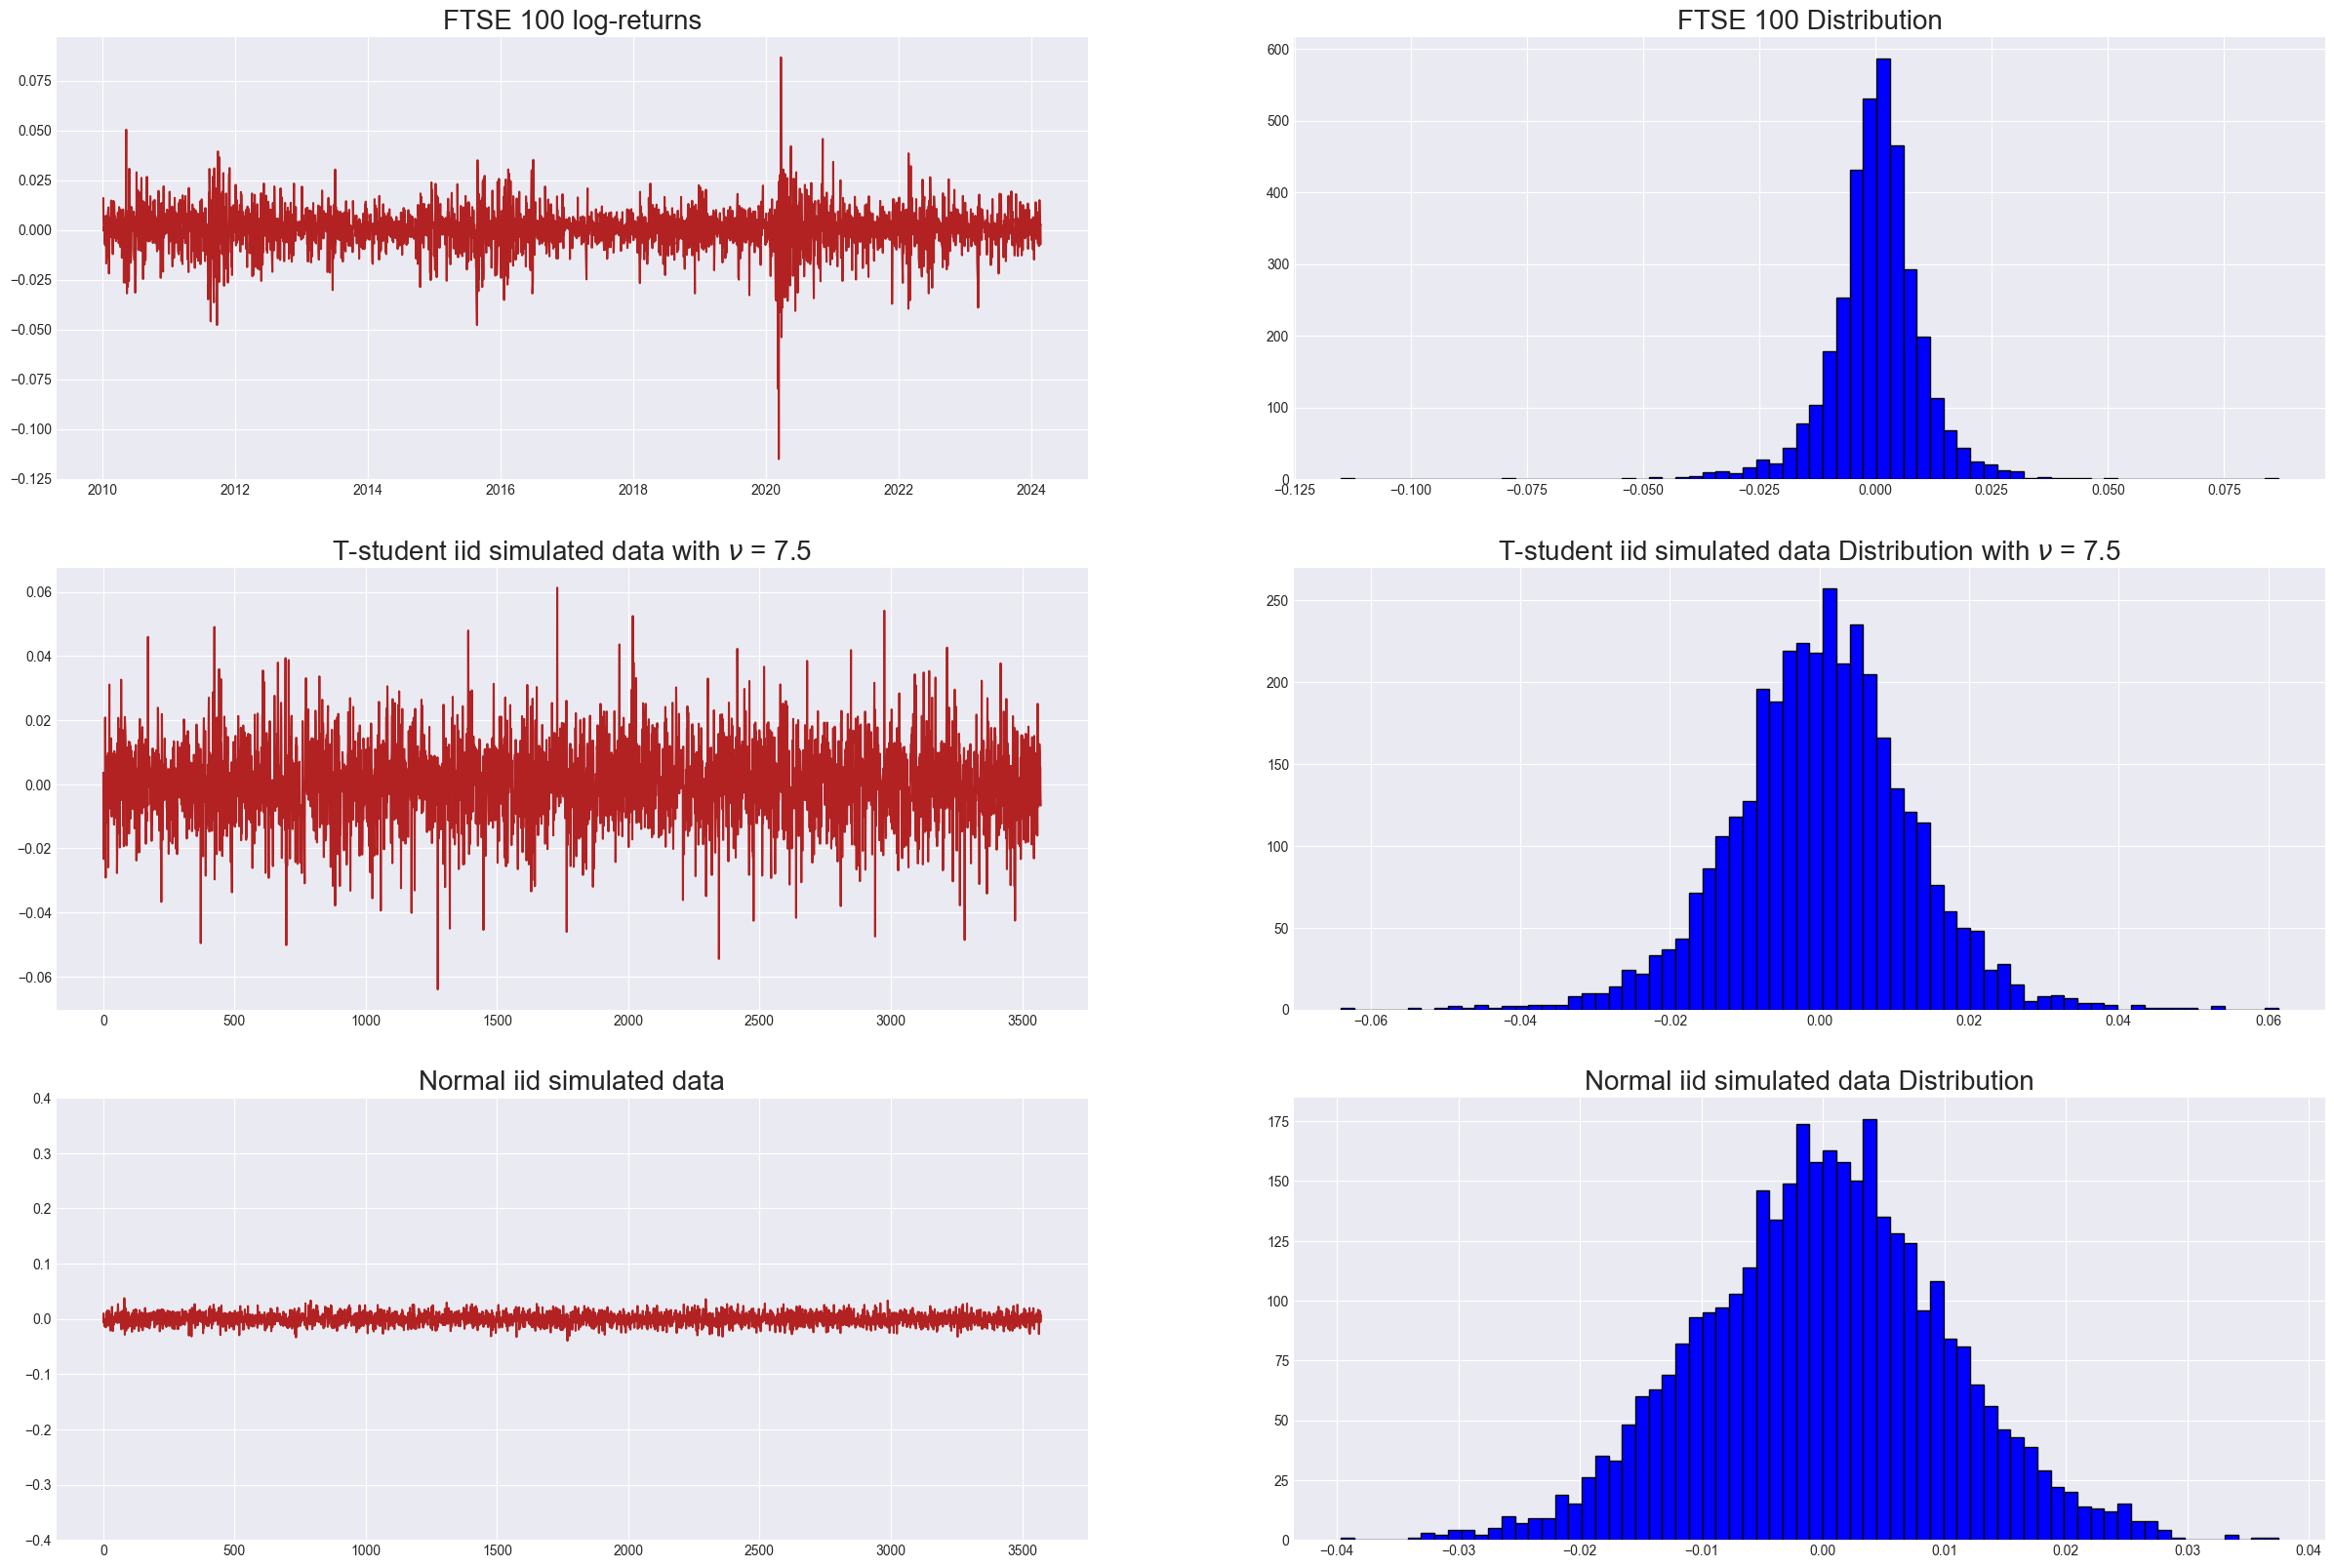

In [55]:
fig, ax = plt.subplots(3,2,figsize=(30,20))

ax[0][0].plot(ftse.log_returns, color='firebrick')
ax[0][0].set_title("FTSE 100 log-returns",fontsize=20)
ax[0][0].grid(True)

ax[0][1].hist(ftse.log_returns, color="blue", edgecolor="black", bins=70)
ax[0][1].set_title("FTSE 100 Distribution", fontsize=20)
ax[0][1].grid(True)

ax[1][0].plot(t_student, color="firebrick")
ax[1][0].set_title(f"T-student iid simulated data with $\u03BD$ = {degree_freedom}",fontsize=20)
ax[1][0].grid(True)

ax[1][1].hist(t_student, color='blue', edgecolor='black', bins=70)
ax[1][1].set_title(f"T-student iid simulated data Distribution with $\u03BD$ = {degree_freedom}", fontsize = 20)
ax[1][1].grid(True)

ax[2][0].plot(normal, color='firebrick')
ax[2][0].set_title("Normal iid simulated data", fontsize = 20)
ax[2][0].grid(True)
ax[2][0].set_ylim(-0.4,0.4)

ax[2][1].hist(normal, color='blue', edgecolor='black', bins=70)
ax[2][1].set_title("Normal iid simulated data Distribution", fontsize=20)
ax[2][1].grid(True)


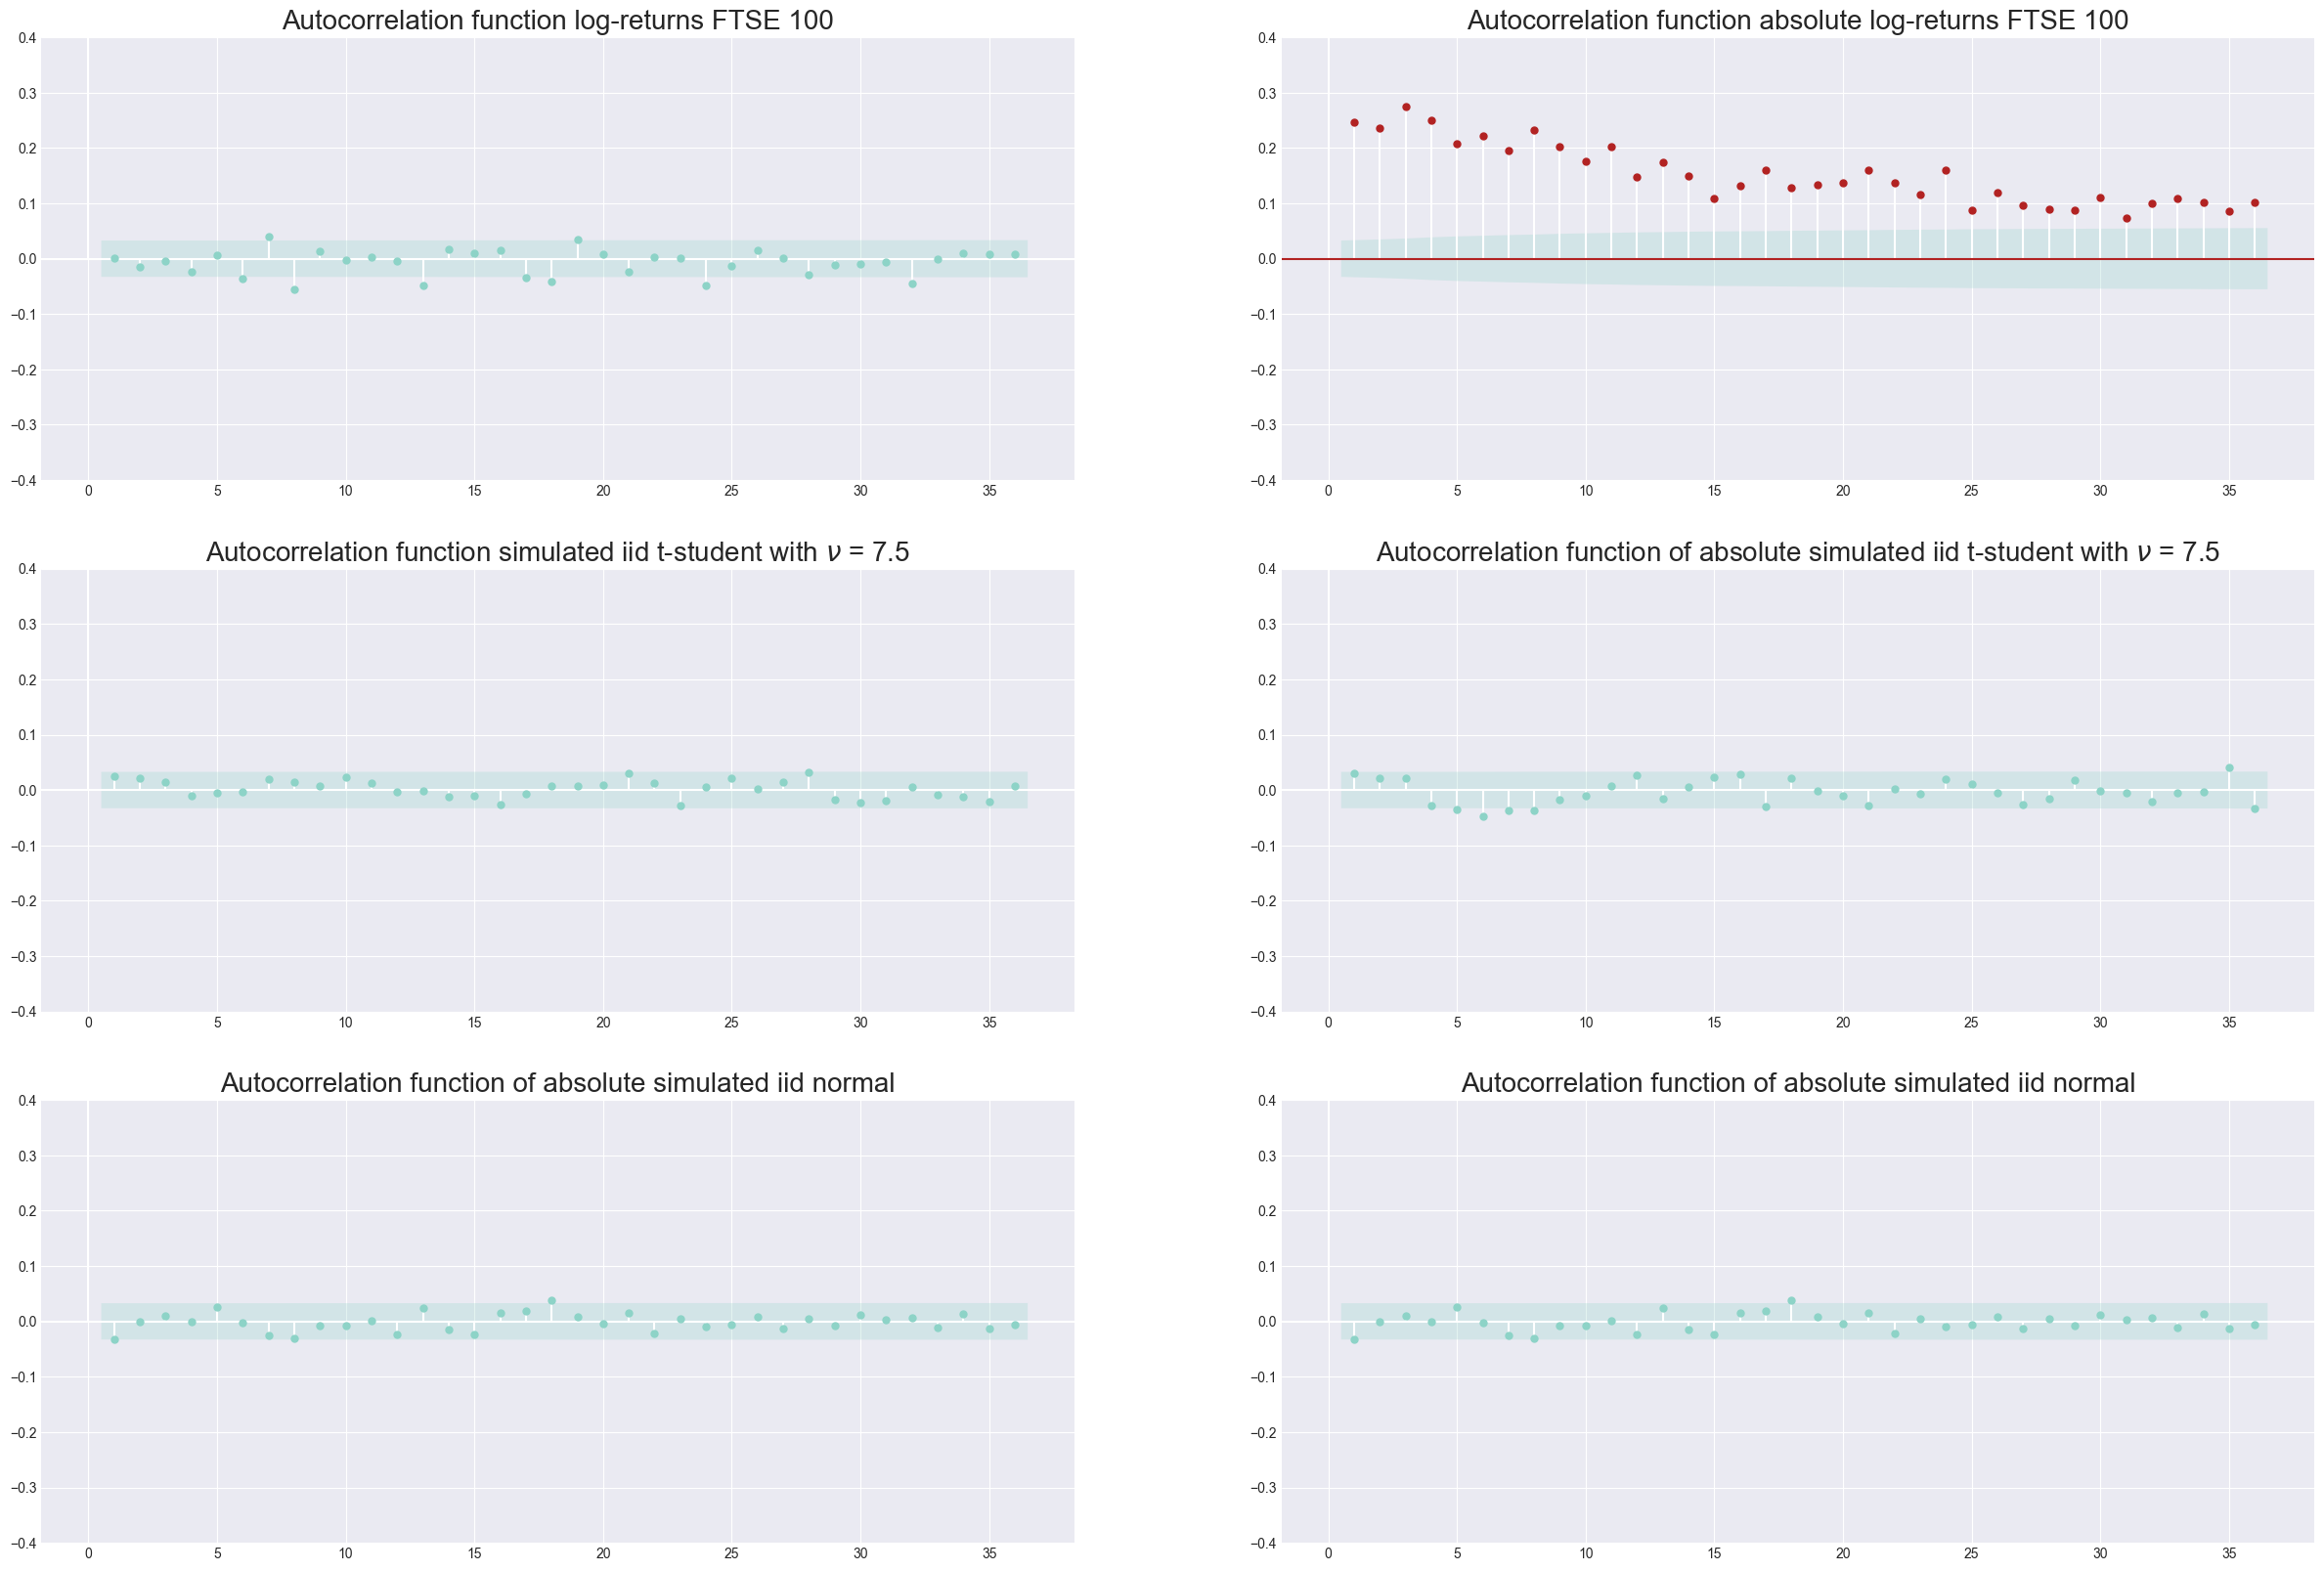

In [56]:
fig, ax = plt.subplots(3,2,figsize=(30,20))


plot_acf(ftse.log_returns.dropna(), ax=ax[0][0], )
ax[0][0].grid(True)
ax[0][0].set_title("Autocorrelation function log-returns FTSE 100", fontsize=20)
ax[0][0].set_ylim(-0.4,0.4)

plot_acf(abs(ftse.log_returns.dropna()), ax=ax[0][1],color='firebrick')
ax[0][1].grid(True)
ax[0][1].set_title("Autocorrelation function absolute log-returns FTSE 100", fontsize=20)
ax[0][1].set_ylim(-0.4,0.4)

plot_acf(t_student, ax=ax[1][0])
ax[1][0].grid(True)
ax[1][0].set_title(f"Autocorrelation function simulated iid t-student with $\u03BD$ = {degree_freedom}",fontsize=20)
ax[1][0].set_ylim(-0.4,0.4)


plot_acf(abs(t_student), ax=ax[1][1])
ax[1][1].grid(True)
ax[1][1].set_title(f"Autocorrelation function of absolute simulated iid t-student with $\u03BD$ = {degree_freedom}", fontsize=20)
ax[1][1].set_ylim(-0.4,0.4)

plot_acf(normal, ax=ax[2][0])
ax[2][0].grid(True)
ax[2][0].set_title("Autocorrelation function of absolute simulated iid normal", fontsize=20)
ax[2][0].set_ylim(-0.4,0.4)


plot_acf(normal, ax=ax[2][1])
ax[2][1].grid(True)
ax[2][1].set_title("Autocorrelation function of absolute simulated iid normal", fontsize=20)
ax[2][1].set_ylim(-0.4,0.4)

plt.show()

Text(0.5, 1.0, 'QQ plot FTSE daily log-returns vs normal')

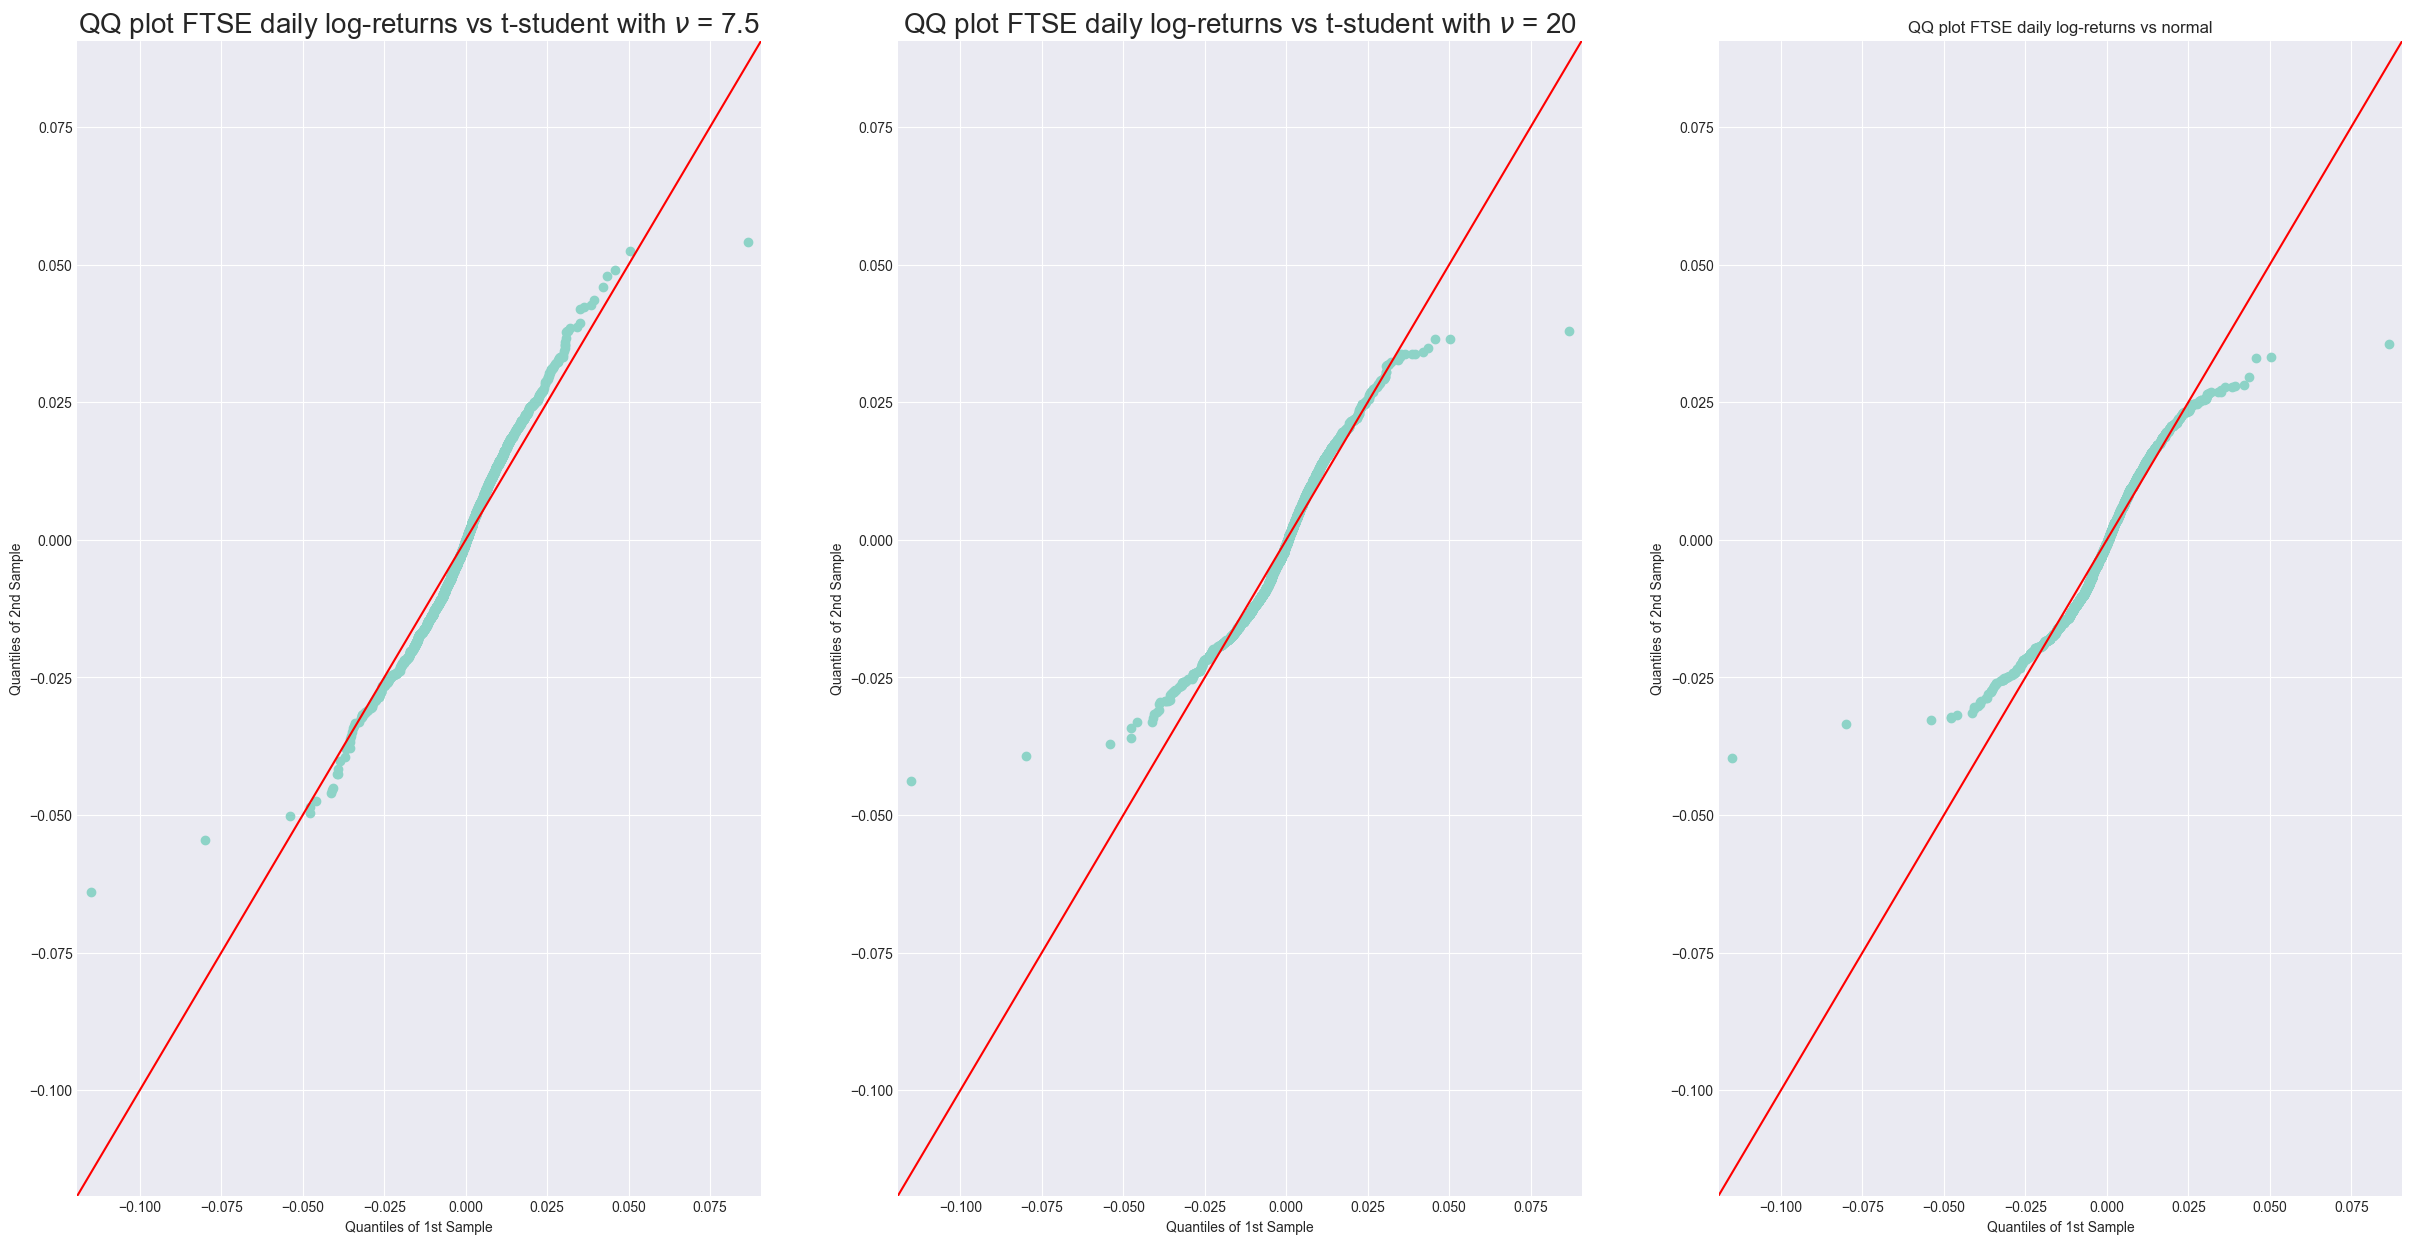

In [57]:
fig, ax = plt.subplots(1,3, figsize=(30,15))

qqplot_2samples(ftse.log_returns,t_student,line="45",ax=ax[0])
ax[0].grid(True)
ax[0].set_title(f'QQ plot FTSE daily log-returns vs t-student with $\u03BD$ = {degree_freedom}',fontsize=20)

#increase the degree of freedom
degree_freedom2 = 20
t_student2 = np.random.standard_t(degree_freedom2,ftse.shape[0])
t_student2 = t_student2*ftse.log_returns.std() + ftse.log_returns.mean()
qqplot_2samples(ftse.log_returns, t_student2,line='45',ax=ax[1])
ax[1].grid(True)
ax[1].set_title(f'QQ plot FTSE daily log-returns vs t-student with $\u03BD$ = 20', fontsize = degree_freedom2)

qqplot_2samples(ftse.log_returns, normal, line='45', ax=ax[2])
ax[2].grid(True)
ax[2].set_title("QQ plot FTSE daily log-returns vs normal")



